<img align="right" width="320" src="http://www.sobigdata.eu/sites/default/files/SoBigData_RI_3.png">

**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti), Salvatore Citraro  
**Python version:**  3.x

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Regression with Python

This notebook contains an overview of basic python functionalities for regression using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

## Overview

Given a dataset containing $N$ observations, <b>Regression</b> is the task of learning a target function $f$ that maps each
input attribute set $X$ into an output $Y$.

The goal is to find the target function that can fit the input data with <b>minimum error</b>.

<b> Linear Regression </b> is a linear approach to modeling the relationship between a dependent variable $Y$ and one or more independent (explanatory) variables $X$. 

* The case of one explanatory variable is called <b>simple linear regression</b>;
* For more than one explanatory variable, the process is called <b>multiple linear regression</b>;
* For multiple correlated dependent variables, the process is called <b>multivariate linear regression</b>.

E.g., For simple linear regression: $Y = mX + b$, where $Y$ is the dependent variable, $X$ is the independent variable, $m$ the slope, $b$ the intercept.

The goal is to find estimated values $m$ and $b$ for the parameters $m$ and $b$ which would provide the <i>best</i> fit for the data points.

In general, a standard approach is to apply the <b>method of least squares</b> which attempts to find the parameters $m, b$ that minimizes the <b>sum of squared error (SSE) </b>:

<br />

<div align="center">
  $$SSE = \sum_i{(y_i - f(x_i))^2} = \sum_i{(y_i - mx_i - b))^2}$$ 
</div>


$m = \frac{N\sum{xy}-\sum{x}\sum{y}}{N\sum{(x^2)}-(\sum{x})^2}$

$b = \frac{\sum{y}-m\sum{x}}{N}$

## A Toy Example

Coefficients: 
 [938.23786125]


Intercept: 
 152.91886182616167


Evaluation:
R2: 0.473
MSE: 2548.072
MAE: 41.227


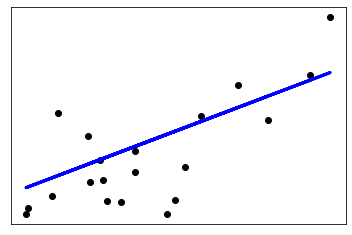

In [3]:
# Code source: Jaques Grobler
# License: BSD 3 clause

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

print('Coefficients: \n', regr.coef_)
print('\n')
print('Intercept: \n', regr.intercept_)
print('\n')

print('Evaluation:')
print('R2: %.3f' % r2_score(diabetes_y_test, diabetes_y_pred))
print('MSE: %.3f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('MAE: %.3f' % mean_absolute_error(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Evaluating Regression

* <b>Mean Absolute Error (MSE)</b>:

$$ MAE = \sum_i^N{|y_i-\hat{y}_i}| $$


* <b>Mean Squared Error (MSE)</b>:

$$ MSE = \sum_i^N{(y_i-\hat{y}_i})^2 $$

* <b>Total Sum of Squares (TSS)</b>:

$$ TSS = \sum_i^N{(y_i-\bar{y}})^2 $$

* <b> Coefficient of Determination ($R^2$) </b>:
    
$$ R^2 = 1 - \frac{MSE}{TSS} $$


<br />
where $N$ are the points, $\hat{y}_i$ is a predicted value; $\bar{y} = \sum_i^N{y_i}$

# Glasgow Norms

In [4]:
df = pd.read_csv("../data/words_glasgow.csv", skipinitialspace=True, sep=',')
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [5]:
target = 'concreteness'

to_drop = ['polysemy', 'word', 'web_corpus_freq', target]
attributes = [col for col in df.columns if col not in to_drop]

X = df[attributes].values
y = df[target]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
X_train[0]

array([6.   , 3.086, 5.059, 4.941, 4.606, 4.906, 4.829, 5.206, 4.03 ])

In [8]:
y_train[0]

5.455

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print('Coefficients: \n', reg.coef_)
print("\n")
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.00185744 -0.19025419  0.0752856  -0.01092416  0.94311187 -0.05513723
  0.06582839 -0.09072955  0.12998068]


Intercept: 
 0.5476200844287051


In [11]:
y_pred = reg.predict(X_test)

In [12]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.876
MSE: 0.255
MAE: 0.386


## Linear Regression in 2 dimensions

In [13]:
var = 4

reg = LinearRegression()
reg.fit(X_train.T[var].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[var].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.829
MSE: 0.351
MAE: 0.461


In [14]:
x_values = sorted([v for v in X_test.T[var]])
y_values = y_pred[np.argsort(X_test.T[var])]

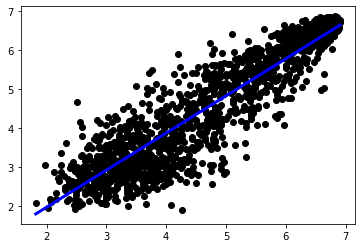

In [15]:
plt.scatter(X_test.T[var], y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()